# Efficient Sub-Pixel Convolutional Neural Network

In [2]:
# 그림을 실행한 브라우저에서 바로 볼 수 있도록
%matplotlib inline

# 구현에 필요한 모듈 import
import os
import matplotlib.pyplot as plt
from data import DIV2K
from model.espcn import espcn
from train import EspcnTrainer

In [3]:
# Super-resolution scale_factor
scale = 4

# Bicubic interpolation을 이용해서image downgrade
downgrade = 'bicubic'

In [4]:
# Model의 weight위치 지정
weights_dir = f'weights/espcn-x{scale}'
weights_file = os.path.join(weights_dir, 'weights.h5')

os.makedirs(weights_dir, exist_ok=True)

print(os.path.isdir(weights_dir))
print(os.path.isfile(weights_file))

True
True


## Datasets
- DIV2K dataset을 사용
 - 001.png ~ 800.png 이미지는 train set으로 사용
 - 801.png ~ 900.png 이미지는 validation set으로 사용

In [5]:
div2k_train = DIV2K(scale=scale, subset='train', downgrade=downgrade)
div2k_valid = DIV2K(scale=scale, subset='valid', downgrade=downgrade)

In [6]:
# train dataset 다운로드
train_ds = div2k_train.dataset(batch_size=16, random_transform=True, repeat_count=None)

# validation dataset 다운로드
valid_ds = div2k_valid.dataset(batch_size=1, random_transform=False, repeat_count=1) #

# Training using ESPCN

In [6]:
# ESPCN Model 선언
trainer = EspcnTrainer(model=espcn(scale=scale), 
                      checkpoint_dir=f'.ckpt/espcn-x{scale}')

In [7]:
# 300,000 단계에 걸쳐서 EDSR모델을 훈련시키고, DIV2K의 validation set의 첫부분의 10개의 이미지에 대해서
# 1,000단계마다 모델을 평가합니다
# 모델을 평가할 대마다 checkpoint 저장
trainer.train(train_ds,
              valid_ds.take(10),
              steps=300000, 
              evaluate_every=1000, 
              save_best_only=True)

1000/300000: loss = 22.067, PSNR = 21.806171 (156.96s)
2000/300000: loss = 13.273, PSNR = 24.018810 (155.89s)
3000/300000: loss = 11.207, PSNR = 25.936489 (155.75s)
4000/300000: loss = 10.230, PSNR = 26.315990 (155.15s)
5000/300000: loss = 9.849, PSNR = 26.502182 (154.86s)
6000/300000: loss = 9.471, PSNR = 26.730320 (155.18s)
7000/300000: loss = 9.260, PSNR = 26.894262 (155.23s)
8000/300000: loss = 9.086, PSNR = 26.968494 (155.45s)
9000/300000: loss = 8.907, PSNR = 27.085714 (154.38s)
10000/300000: loss = 8.815, PSNR = 27.097055 (155.45s)
11000/300000: loss = 8.666, PSNR = 27.239410 (155.47s)
12000/300000: loss = 8.586, PSNR = 27.290417 (154.52s)
13000/300000: loss = 8.483, PSNR = 27.346060 (155.53s)
14000/300000: loss = 8.459, PSNR = 27.353012 (155.51s)
15000/300000: loss = 8.438, PSNR = 27.411053 (155.70s)
16000/300000: loss = 8.341, PSNR = 27.470181 (155.51s)
17000/300000: loss = 8.297, PSNR = 27.462048 (155.49s)
18000/300000: loss = 8.289, PSNR = 27.506519 (155.72s)
19000/300000: l

150000/300000: loss = 7.159, PSNR = 28.357428 (155.64s)
151000/300000: loss = 7.207, PSNR = 28.331182 (155.70s)
152000/300000: loss = 7.149, PSNR = 28.374790 (155.71s)
153000/300000: loss = 7.106, PSNR = 28.217779 (155.55s)
154000/300000: loss = 7.238, PSNR = 28.316980 (155.88s)
155000/300000: loss = 7.150, PSNR = 28.375839 (155.64s)
156000/300000: loss = 7.176, PSNR = 28.389500 (154.55s)
157000/300000: loss = 7.208, PSNR = 28.346664 (155.49s)
158000/300000: loss = 7.160, PSNR = 28.335728 (155.78s)
159000/300000: loss = 7.160, PSNR = 28.361135 (155.88s)
160000/300000: loss = 7.113, PSNR = 28.377789 (155.81s)
161000/300000: loss = 7.135, PSNR = 28.394207 (155.77s)
162000/300000: loss = 7.114, PSNR = 28.380463 (155.61s)
163000/300000: loss = 7.251, PSNR = 28.330853 (155.83s)
164000/300000: loss = 7.191, PSNR = 28.390705 (156.03s)
165000/300000: loss = 7.138, PSNR = 28.364826 (156.09s)
166000/300000: loss = 7.205, PSNR = 28.392431 (156.04s)
167000/300000: loss = 7.160, PSNR = 28.392109 (1

297000/300000: loss = 6.972, PSNR = 28.463018 (155.97s)
298000/300000: loss = 6.989, PSNR = 28.467274 (156.18s)
299000/300000: loss = 6.942, PSNR = 28.462696 (156.24s)
300000/300000: loss = 7.101, PSNR = 28.464504 (156.23s)


In [8]:
# PSNR값이 가장 높은 체크포인트에서 복원
trainer.restore()

Model restored from checkpoint at step 296000.


In [9]:
# validation set을 이용해서 Model을 평가
psnrv = trainer.evaluate(valid_ds)
print(f'PSNR = {psnrv.numpy():3f}')

PSNR = 27.751116


In [10]:
# Model의 weight저장
trainer.model.save_weights(weights_file)

# Demo

In [11]:
model = espcn(scale=scale)
model.load_weights(weights_file)

In [12]:
from model import resolve_single
from utils import load_image, plot_sample

def resolve_and_plot(lr_image_path):
    lr = load_image(lr_image_path)
    sr = resolve_single(model, lr)
    plot_sample(lr, sr)

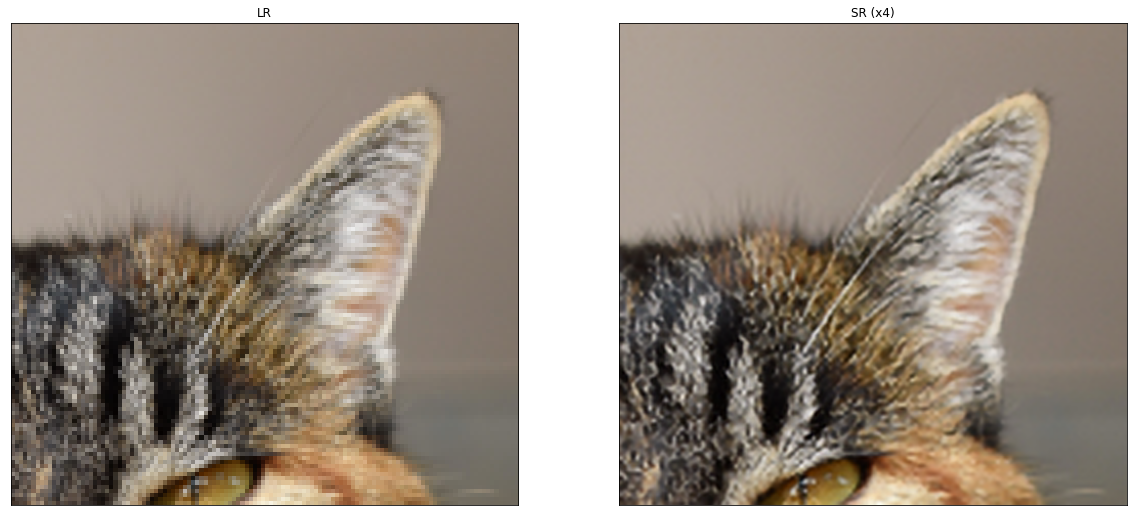

In [13]:
resolve_and_plot('demo/0869x4-crop.png')

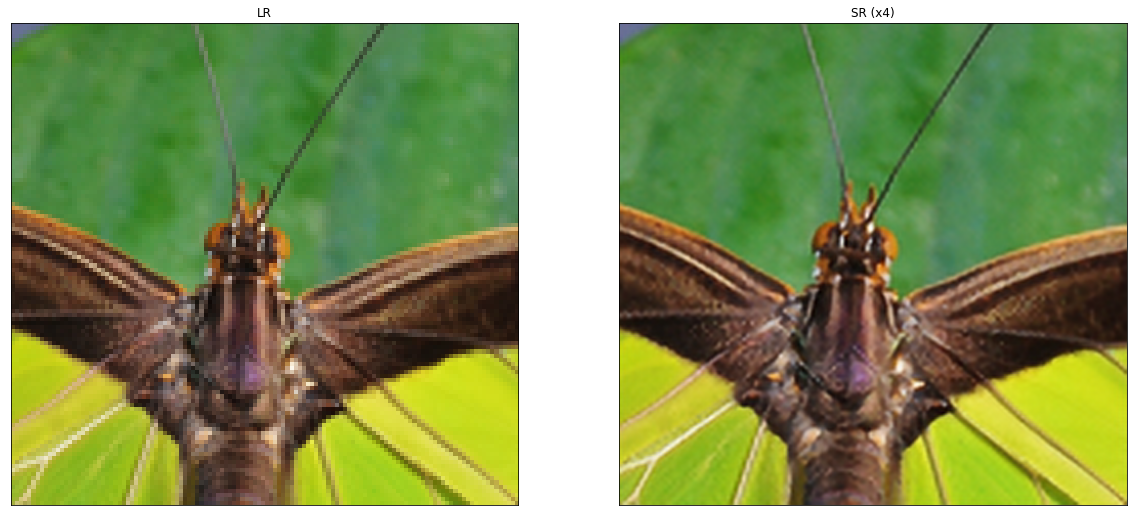

In [14]:
resolve_and_plot('demo/0829x4-crop.png')

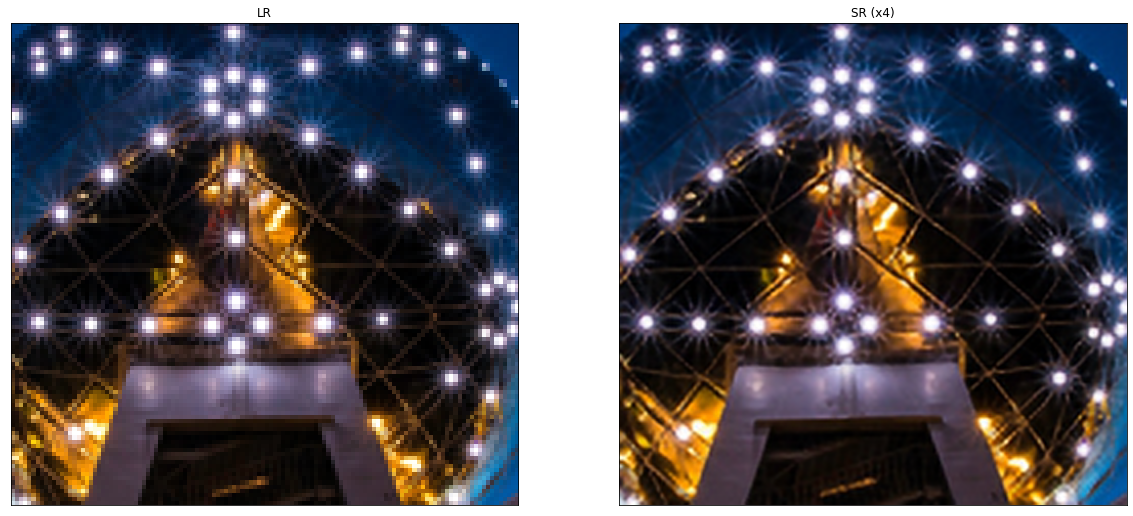

In [15]:
resolve_and_plot('demo/0851x4-crop.png')